# CharacterTrajectories dataset

This dataset is from the [UCI archive](https://archive.ics.uci.edu/ml/datasets/Character+Trajectories). It has been modified into a tts file by the [UEA & UCR Time Series Classification repository](https://timeseriesclassification.com/index.php). 

## Description of the data

The characters here were used for a PhD study on primitive extraction using HMM based models. The data consists of 2858 character samples. The data was captured using a WACOM tablet. Three dimensions were kept - x, y, and pen tip force. The data has been numerically differentiated and Gaussian smoothed, with a sigma value of 2. Data was captured at 200Hz. The data was normalised. Only characters with a single 'PEN-DOWN' segment were considered. Character segmentation was performed using a pen tip force cut-off point. The characters have also been shifted so that their velocity profiles best match the mean of the set. Each instance is a 3-dimensional pen tip velocity trajectory. The original data has different length cases. The class label is one of 20 characters 'a' 'b' 'c' 'd' 'e' 'g' 'h' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 'u' 'v' 'w' 'y' 'z'.


## Bibliography

* B.H. Williams, M. Toussaint, and A.J. Storkey. Extracting motion primitives from natural handwriting data. In ICANN, volume 2, pages 634-643, 2006. 
* B.H. Williams, M. Toussaint, and A.J. Storkey. A primitive based generative model to infer timing information in unpartitioned handwriting data. In IJCAI, pages 1119-1124, 2007. 
* B.H. Williams, M. Toussaint, and A.J. Storkey. Modelling motion primitives and their timing in biologically executed movements. In J.C. Platt, D. Koller, Y. Singer, and S. Roweis, editors, Advances in Neural Information Processing Systems 20, pages 1609-1616. MIT Press, Cambridge, MA, 2008.
* Ramsay and Silverman, Functional Data Analysis, 2005, Springer
* Ramsay, Hooker and Graves, Functional Data Analysis with R and MATLAB, 2009, Springer
* Ramsay and Li, Curve Registration, J. R. Statist. Soc. B (1998) 60, Part 2, pp. 351-363
* Kneip, Li, MacGibbon and Ramsay, Curve Registration by Local Regression, The Canadian Journal of Statistics, Vol. 28, No. 1 (March., 2000), pp. 19-29
* Petitjean. Description des alignements formés par DTW. 2011. Hal-00647522


In [0]:
!pip install sktime

In [0]:
# Load python packages
import glob
import random
import re

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.integrate import simps
from scipy.interpolate import InterpolatedUnivariateSpline

from sktime.utils.load_data import load_from_tsfile_to_dataframe

c = [name for name, hex in matplotlib.colors.cnames.items()]

In [0]:
# Load the data
train_x, train_y = load_from_tsfile_to_dataframe('CharacterTrajectories_TRAIN.tts')
test_x, test_y = load_from_tsfile_to_dataframe('CharacterTrajectories_TEST.tts')

train_y = train_y.astype(np.int8)
test_y = test_y.astype(np.int8)

In [0]:
train_x

,dim_0,dim_1,dim_2
0,0 -0.130150 1 -0.183121 2 -0.23410...,0 0.071323 1 0.083973 2 0.08553...,0 0.899306 1 1.157239 2 1.32046...
1,0 -0.085541 1 -0.114704 2 -0.14144...,0 0.135489 1 0.181716 2 0.21991...,0 0.738270 1 0.946410 2 1.09188...
2,0 -0.026161 1 -0.037501 2 -0.04895...,0 0.053789 1 0.074516 2 0.09424...,0 0.617474 1 0.790598 2 0.91948...
3,0 -0.002855 1 -0.009104 2 -0.02368...,0 0.151691 1 0.203098 2 0.24496...,0 0.828331 1 1.057755 2 1.19544...
4,0 -0.001489 1 -0.004780 2 -0.01251...,0 0.025898 1 0.035269 2 0.04193...,0 0.868009 1 1.097823 2 1.24477...
...,...,...,...
1417,0 -0.076581 1 -0.088833 2 -0.08868...,0 0.023788 1 0.025496 2 0.02281...,0 0.495192 1 0.594196 2 0.62980...
1418,0 -0.081196 1 -0.082586 2 -0.05293...,0 0.000007 1 0.000040 2 0.00018...,0 0.064126 1 0.146382 2 0.27618...
1419,0 0.757890 1 1.051458 2 1.32906...,0 0.021348 1 0.020847 2 0.01173...,0 0.426796 1 0.536613 2 0.60377...
1420,0 0.399834 1 0.564154 2 0.73210...,0 -0.094600 1 -0.121508 2 -0.13759...,0 0.408796 1 0.483822 2 0.51064...


In [0]:
test_x

,dim_0,dim_1,dim_2
0,0 0.043915 1 0.033922 2 0.00725...,0 -0.010011 1 -0.004357 2 0.00595...,0 0.536491 1 0.767180 2 0.99386...
1,0 -0.001661 1 -0.005507 2 -0.01504...,0 0.061471 1 0.083766 2 0.10370...,0 0.995215 1 1.280880 2 1.46595...
2,0 -0.048079 1 -0.084437 2 -0.12808...,0 0.008772 1 0.017738 2 0.03022...,0 0.863616 1 1.129004 2 1.30328...
3,0 -0.064445 1 -0.096044 2 -0.13116...,0 0.104525 1 0.136315 2 0.15875...,0 0.779901 1 1.025939 2 1.20647...
4,0 0.003907 1 0.009296 2 0.01784...,0 0.033683 1 0.048481 2 0.06552...,0 0.605694 1 0.846693 2 1.06216...
...,...,...,...
1431,0 0.303541 1 0.453181 2 0.62187...,0 -0.039797 1 -0.061128 2 -0.08364...,0 0.368717 1 0.463711 2 0.51912...
1432,0 0.476879 1 0.685705 2 0.89755...,0 0.040467 1 0.049998 2 0.05262...,0 0.428066 1 0.531983 2 0.58524...
1433,0 0.465435 1 0.667588 2 0.87786...,0 0.117572 1 0.154650 2 0.18185...,0 0.133618 1 0.188251 2 0.22723...
1434,0 0.344056 1 0.529080 2 0.75033...,0 -0.076539 1 -0.120442 2 -0.16749...,0 0.449743 1 0.563532 2 0.62978...


In [0]:
np.unique(train_y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int8)

The multivariate time series are presented as Pandas dataframe with multiple columns (which represents the n-dimensional data) and the different observations as rows. 
Let's plot the observations in the train/test set, to see what the data look like.

In [0]:
def plot_univariate(train_x, train_y, test_x, test_y, dim, colors):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    for obs, y in zip(train_x[dim], train_y):
        ax0.plot(obs, color=colors[y], label=y)

    for obs, y in zip(test_x[dim], test_y):
        ax1.plot(obs, color=colors[y], label=y)

    plt.show()
    
def plot_multivariate(train_x, train_y, test_x, test_y, y):
    """For a particular class.
    """
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    train_slice = train_x[train_y == y]
    for obs1, obs2 in zip(train_slice.iloc[:, 0], train_slice.iloc[:, 1]):
        if len(obs1) == len(obs2):
            ax0.plot(obs1, obs2)
        
    test_slice = test_x[test_y == y]
    for obs1, obs2 in zip(test_slice.iloc[:, 0], test_slice.iloc[:, 1]):
        if len(obs1) == len(obs2):
            ax1.plot(obs1, obs2)
        
    plt.show()

def plot_one_obs(train_x, train_y, test_x, test_y, y):
    """One observation of a particular class.
    """
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    train_obs = train_x[train_y == y].iloc[0]
    if len(train_obs[0]) == len(train_obs[1]):
        ax0.plot(train_obs[0], train_obs[1])
    
    test_obs = test_x[test_y == y].iloc[0]
    if len(test_obs[0]) == len(test_obs[1]):
        ax1.plot(test_obs[0], test_obs[1])
    
    plt.show()

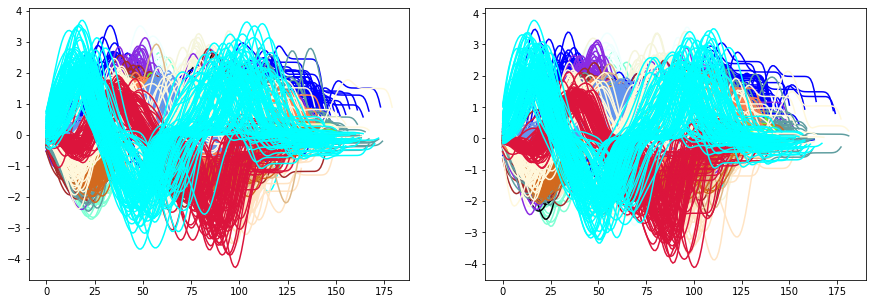

In [0]:
# Plot the first dimension
plot_univariate(train_x, train_y, test_x, test_y, 'dim_0', c)

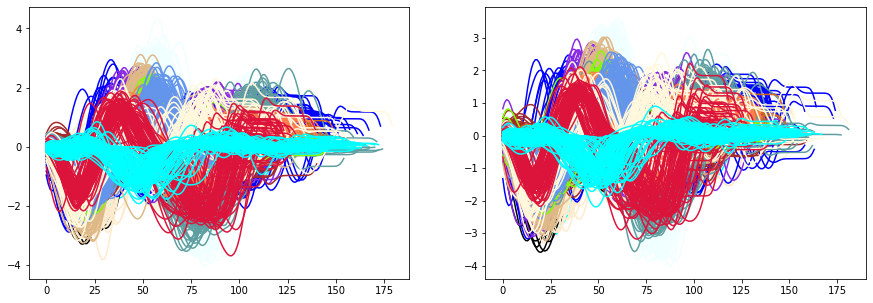

In [0]:
# Plot the second dimension
plot_univariate(train_x, train_y, test_x, test_y, 'dim_1', c)

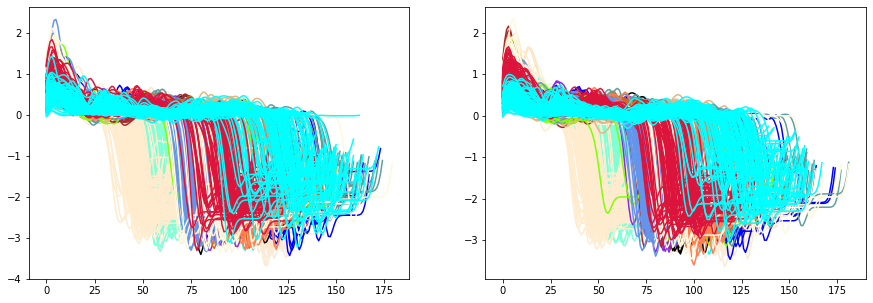

In [0]:
# Plot the third dimension
plot_univariate(train_x, train_y, test_x, test_y, 'dim_2', c)

In [0]:
# Plot multivariate data
for idx in np.unique(train_y):
    plot_multivariate(train_x, train_y, test_x, test_y, idx)

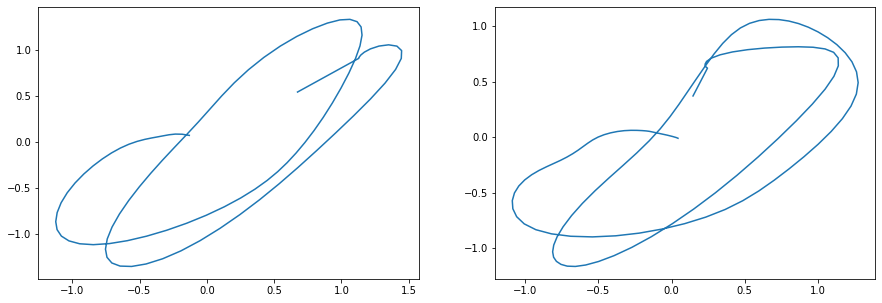

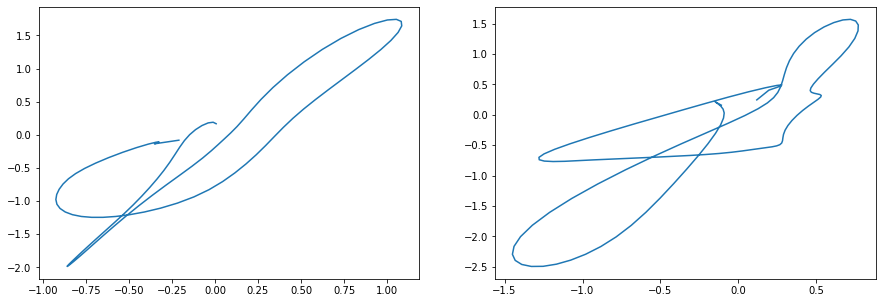

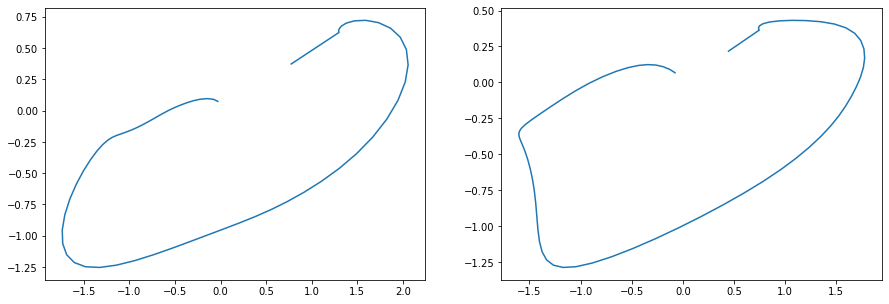

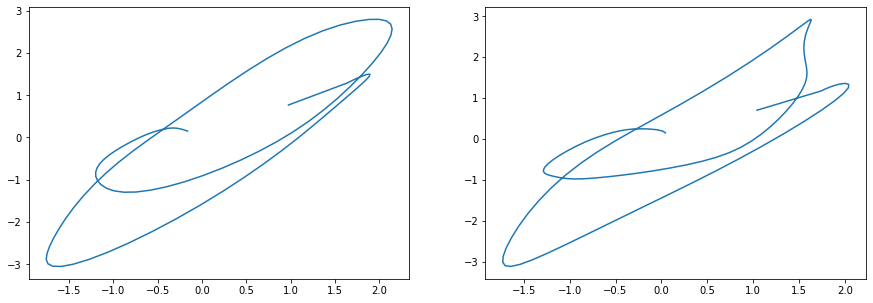

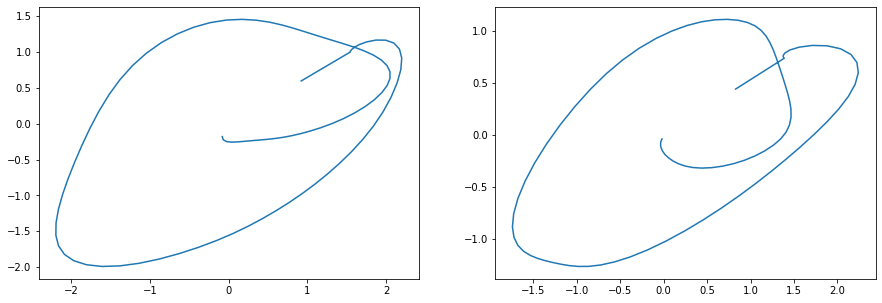

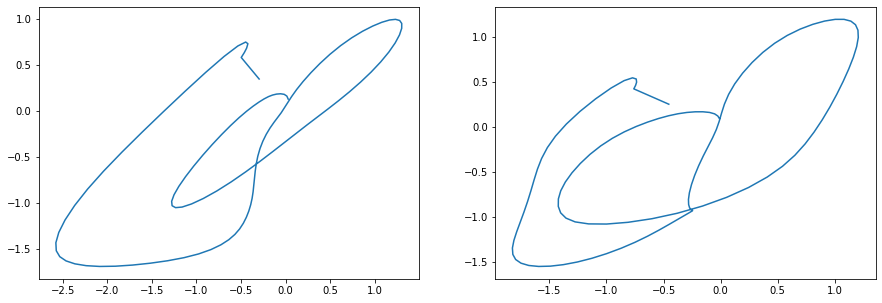

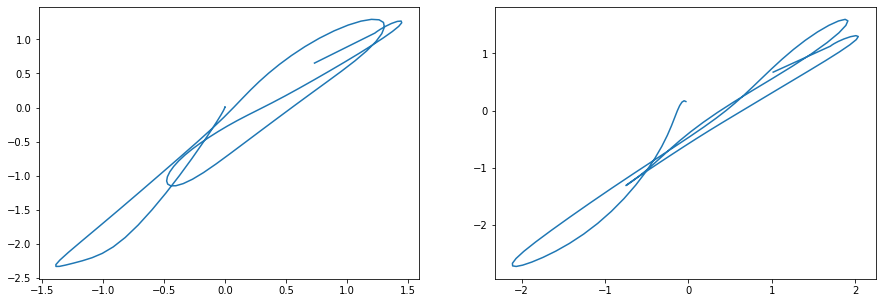

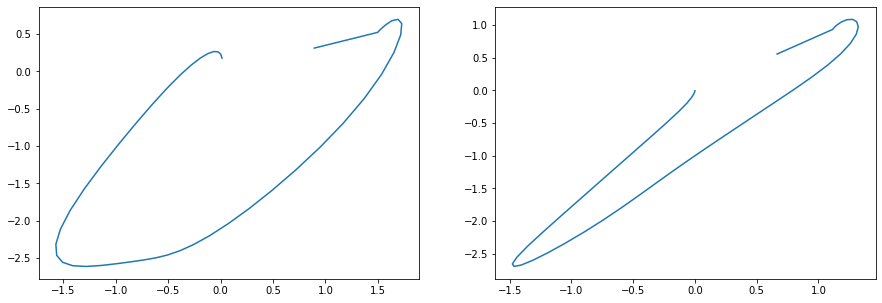

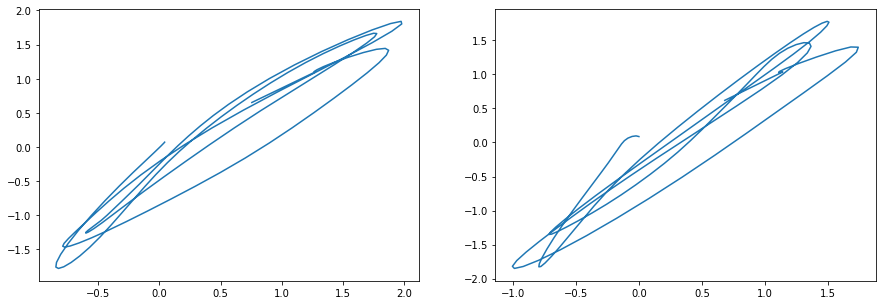

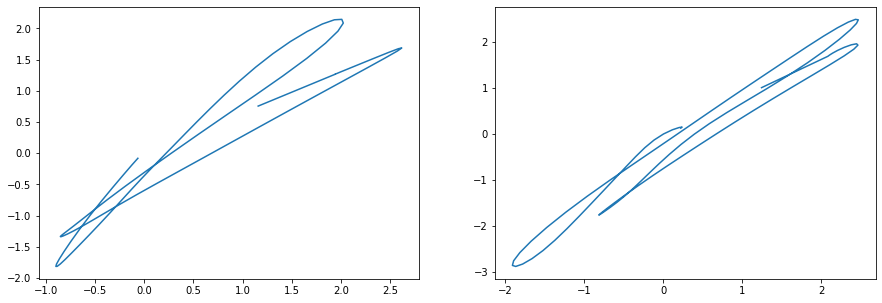

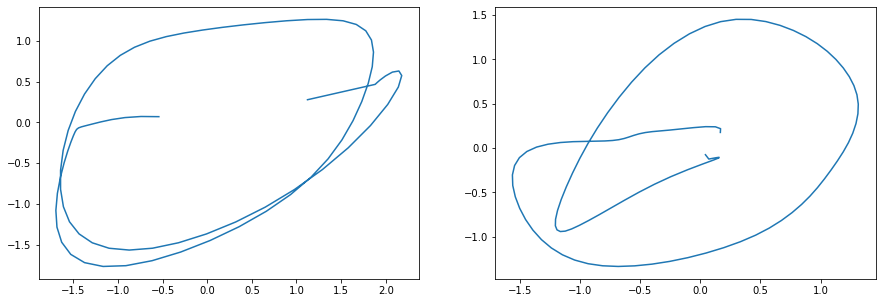

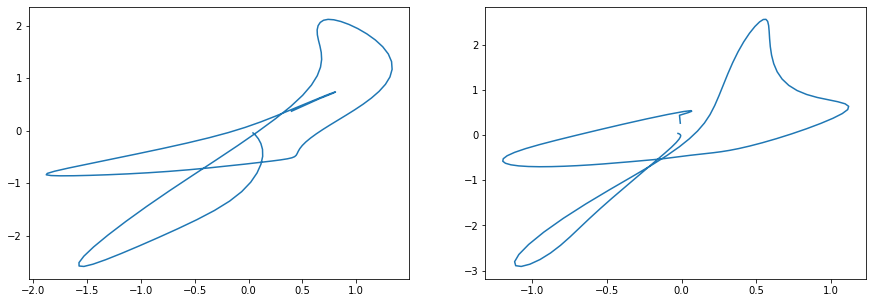

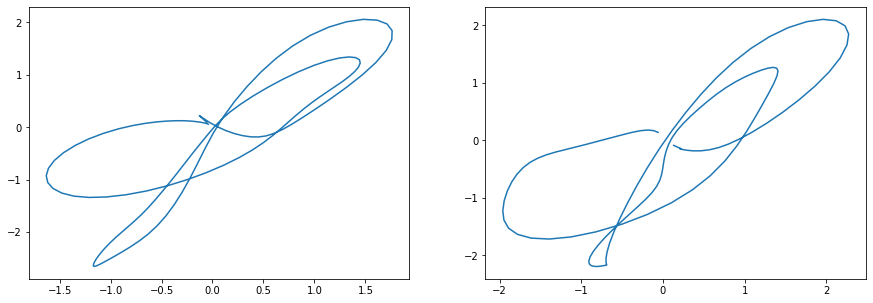

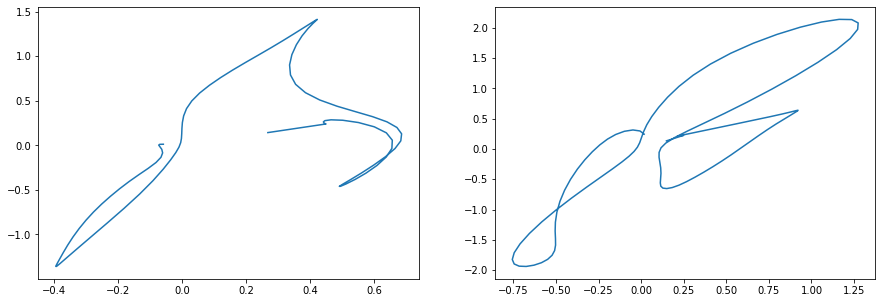

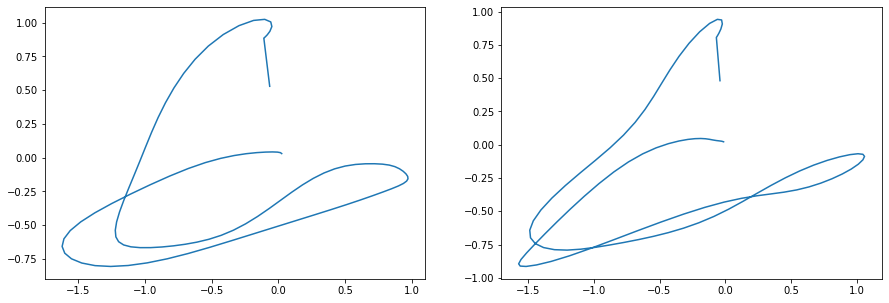

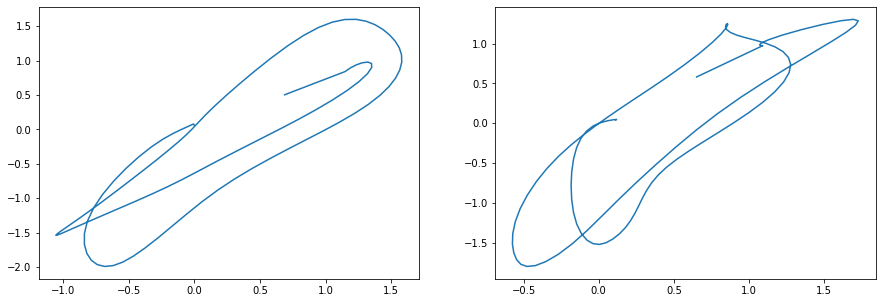

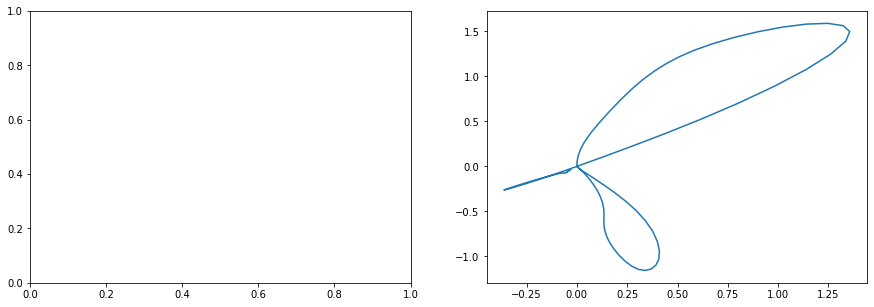

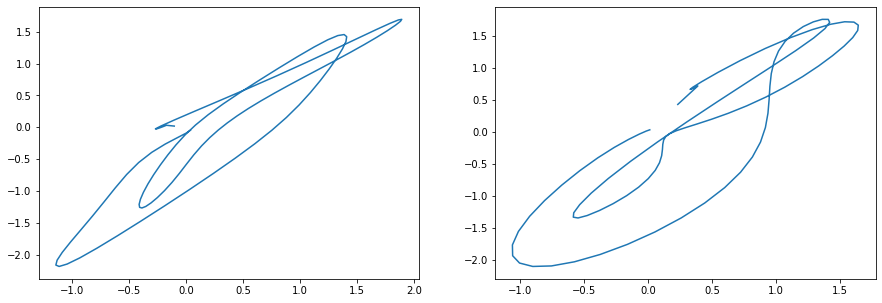

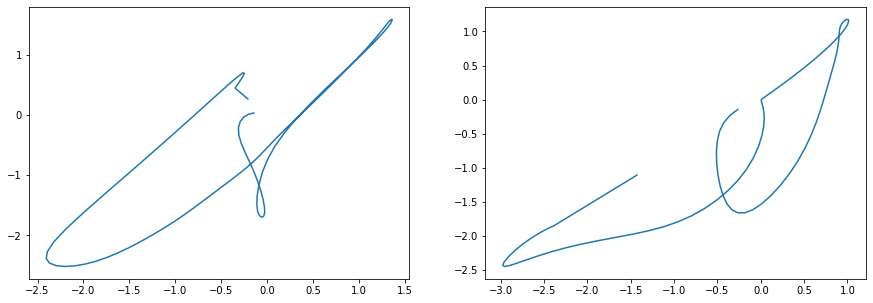

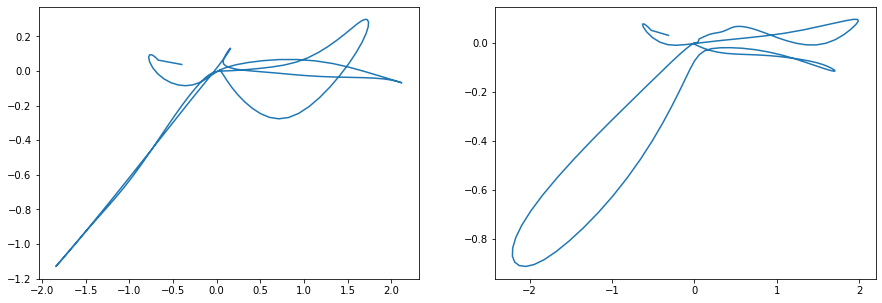

In [0]:
# One observation of each class
for idx in np.unique(train_y):
    plot_one_obs(train_x, train_y, test_x, test_y, idx)

As they say that the data has been numerically derivated, we do the inverse operation in order to retrieve the original data. 

In [0]:
train_x_pos = {'dim_0_int': [np.cumsum(x) for x in train_x['dim_0']],
               'dim_1_int': [np.cumsum(x) for x in train_x['dim_1']],
               'dim_2_int': [np.cumsum(x) for x in train_x['dim_2']]}
train_x_pos = pd.DataFrame(data = train_x_pos)

In [0]:
test_x_pos = {'dim_0_int': [np.cumsum(x) for x in test_x['dim_0']],
              'dim_1_int': [np.cumsum(x) for x in test_x['dim_1']],
              'dim_2_int': [np.cumsum(x) for x in test_x['dim_2']]}
test_x_pos = pd.DataFrame(data = test_x_pos)

In [0]:
# Plot multivariate data
for idx in np.unique(train_y):
    plot_multivariate(train_x_pos , train_y, test_x_pos, test_y, idx)

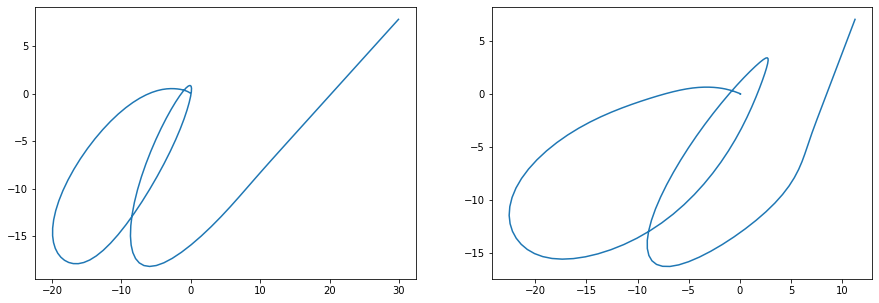

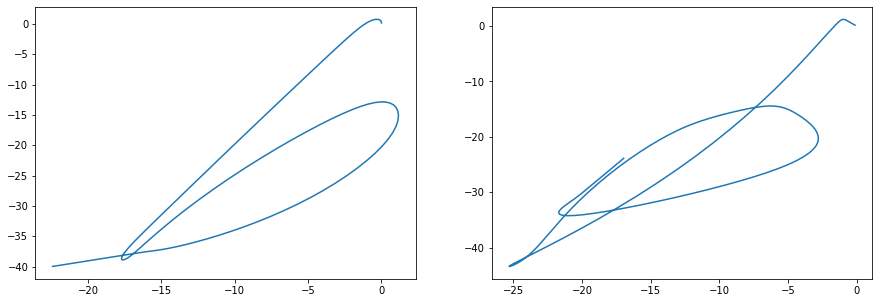

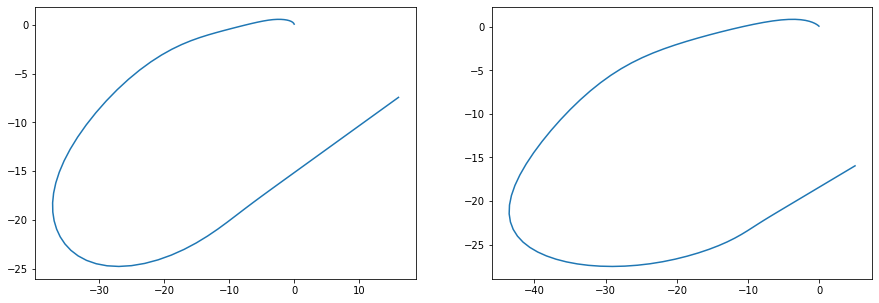

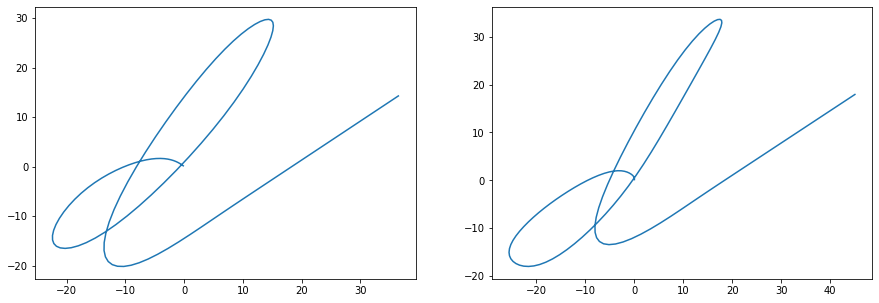

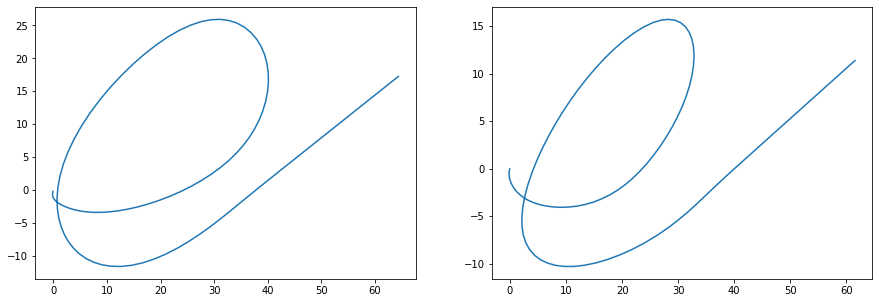

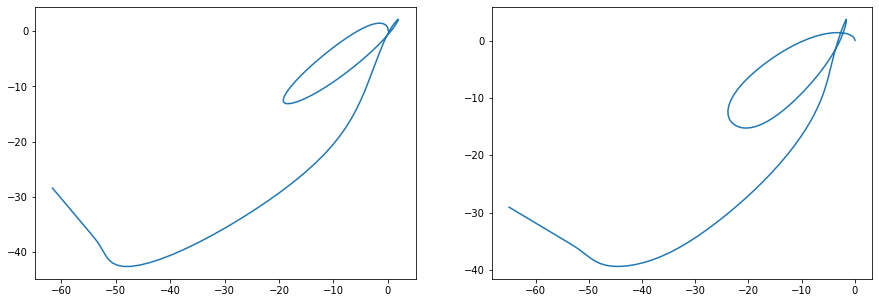

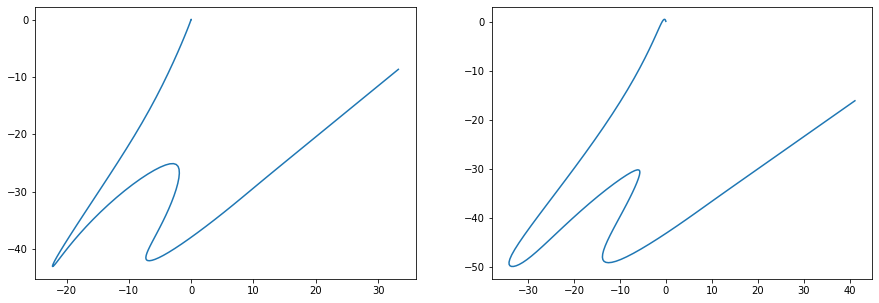

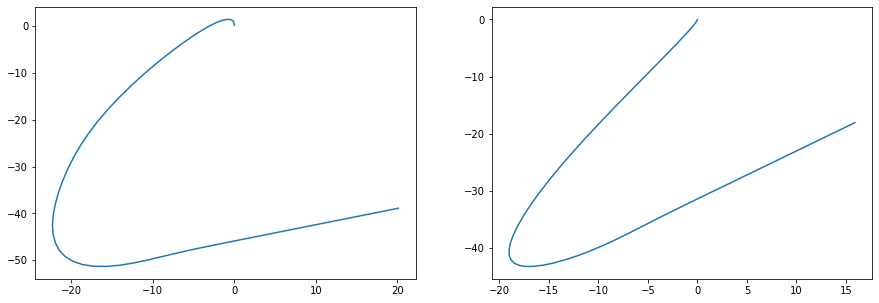

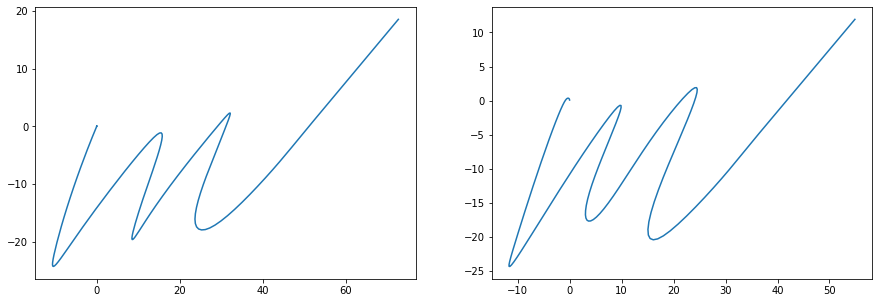

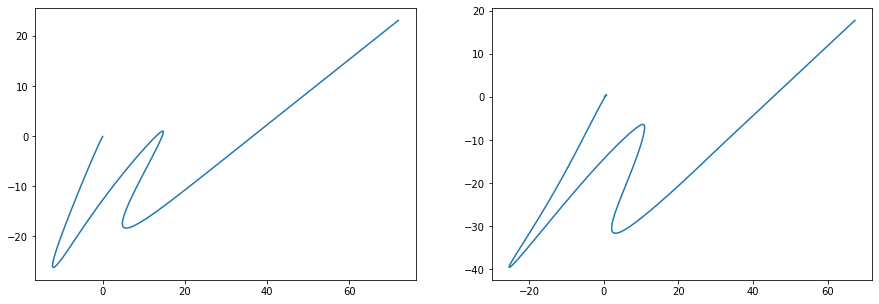

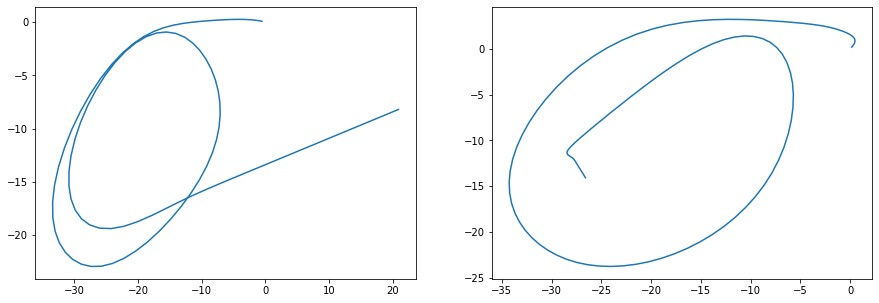

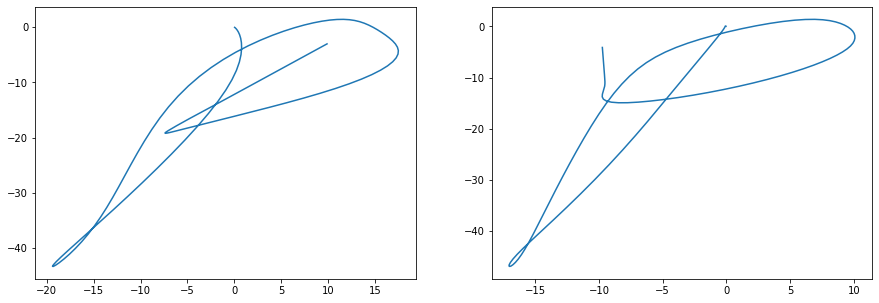

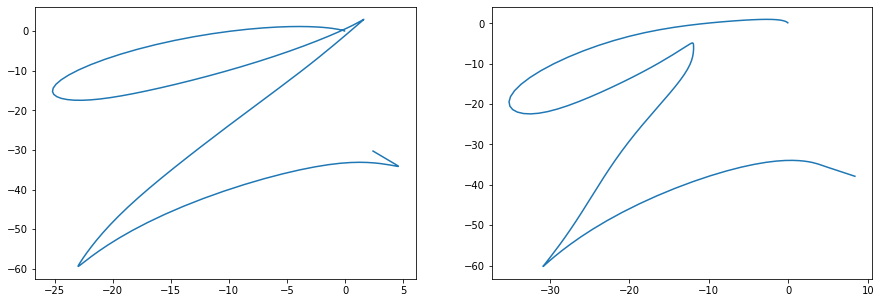

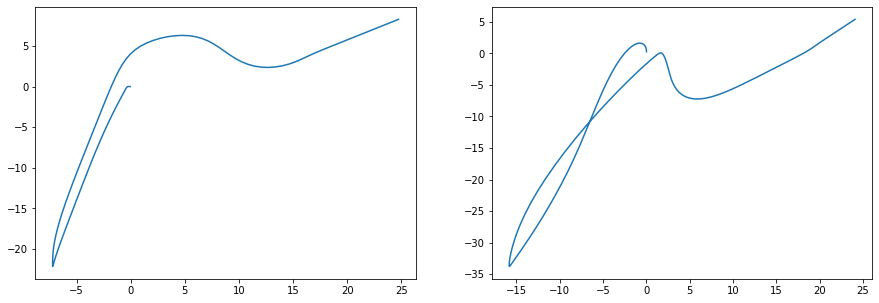

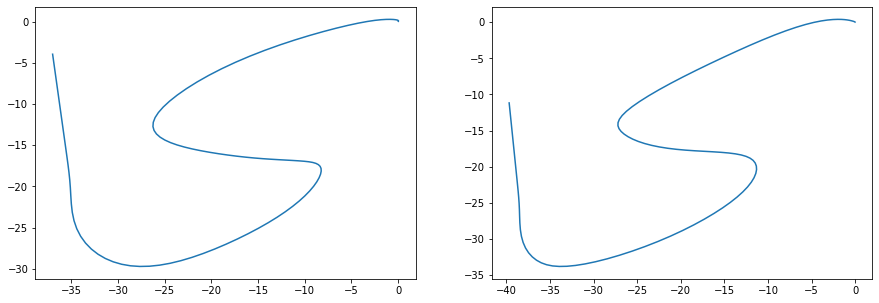

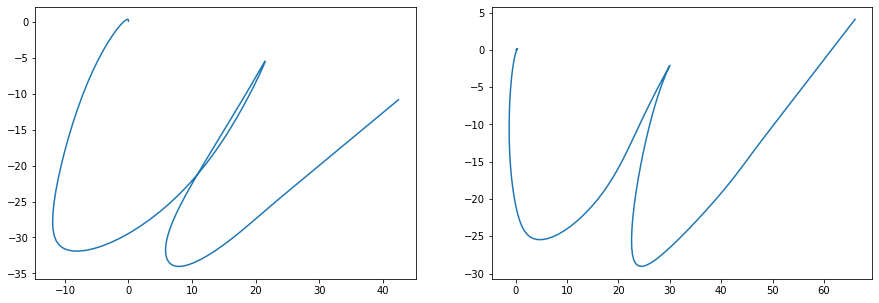

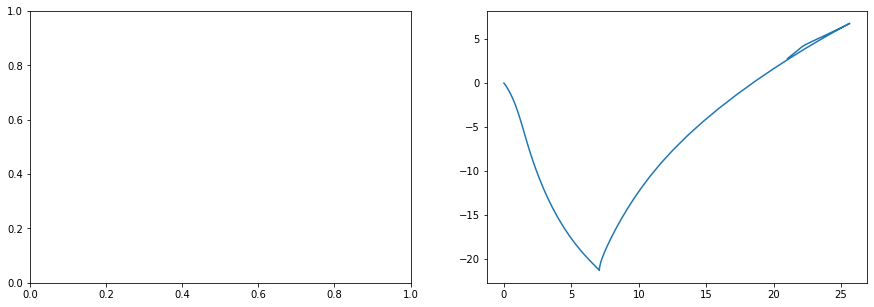

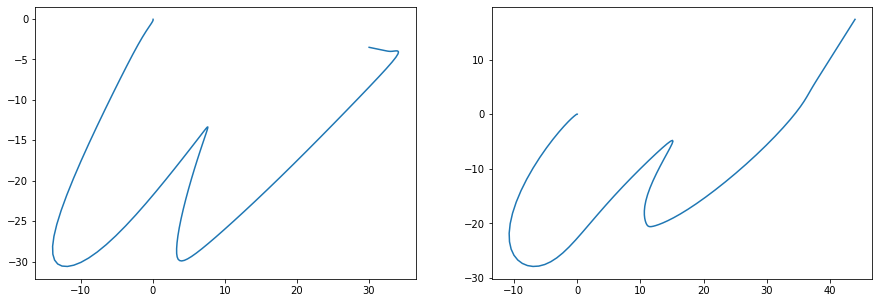

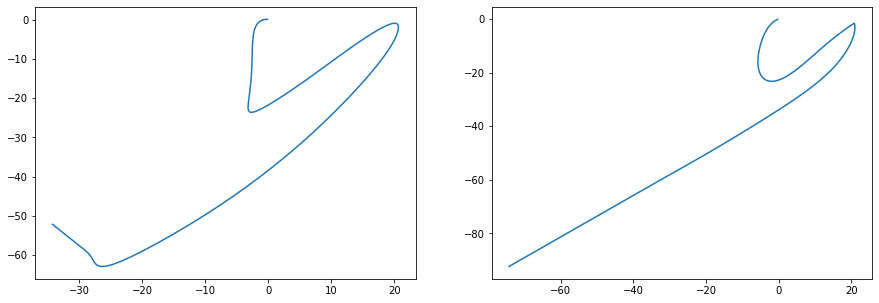

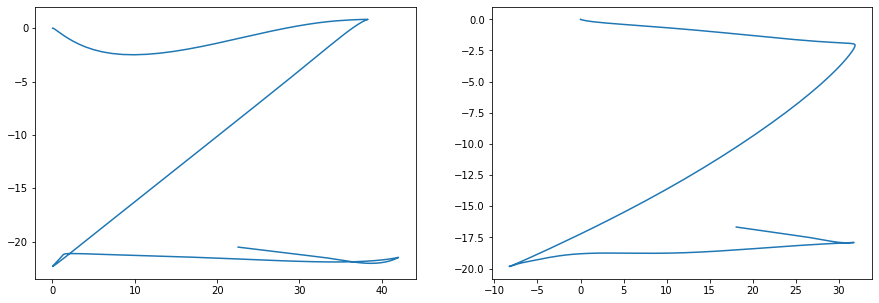

In [0]:
# One observation of each class
for idx in np.unique(train_y):
    plot_one_obs(train_x_pos, train_y, test_x_pos, test_y, idx)

In [0]:
final_train_x = pd.concat([train_x, train_x_pos], axis=1)
final_test_x = pd.concat([test_x, test_x_pos], axis=1)

I remark that some of the observations are not well designed (more points in the first dimension than the second one). So, I propose to delete those rows.

In [0]:
final_test_y = pd.DataFrame(test_y).drop([idx for idx, rows in final_test_x.iterrows() if len(rows['dim_0']) != len(rows['dim_1'])])
final_test_x = final_test_x.drop([idx for idx, rows in final_test_x.iterrows() if len(rows['dim_0']) != len(rows['dim_1'])])

final_train_y = pd.DataFrame(train_y).drop([idx for idx, rows in final_train_x.iterrows() if len(rows['dim_0']) != len(rows['dim_1'])])
final_train_x = final_train_x.drop([idx for idx, rows in final_train_x.iterrows() if len(rows['dim_0']) != len(rows['dim_1'])])

In [0]:
test = pd.concat([final_test_x, final_test_y], axis=1)
train = pd.concat([final_train_x, final_train_y], axis=1)

In [0]:
# Export the data
train.to_json('train.json')
train.to_pickle('train.pkl')

test.to_json('test.json')
test.to_pickle('test.pkl')

Load the .pkl files to do some pre-preprocessing.

In [0]:
train = pd.read_pickle('train.pkl')
test = pd.read_pickle('test.pkl')

Let's compute the mean number of points per curve. It won't be the same for different rows but for a fixed one, every dimension should have the same length.

In [0]:
np.mean([len(row) for row in train['dim_0']])

120.03997144896502

In [0]:
np.mean([len(row) for row in test['dim_0']])

119.6015514809591

Let's interpolate the curves in order to have the same number of sampling points within each curves (around the mean).

In [0]:
all_train = []
for idx, column in enumerate(train.columns[0:6]):
  res = []
  for row in train[column]:
    t = np.linspace(0, 1, num=len(row))
    s = InterpolatedUnivariateSpline(x = t, y = row)
    fit = s(np.linspace(0, 1, 120))
    res.append(fit)

  res = pd.DataFrame(res)
  all_train.append(res)

all_test = []
for idx, column in enumerate(test.columns[0:6]):
  res = []
  for row in test[column]:
    t = np.linspace(0, 1, num=len(row))
    s = InterpolatedUnivariateSpline(x = t, y = row)
    fit = s(np.linspace(0, 1, 120))
    res.append(fit)

  res = pd.DataFrame(res)
  all_test.append(res)

In [0]:
# Save data into different .csv
all_train[0].to_csv('train_vX.csv')
all_train[1].to_csv('train_vY.csv')
all_train[2].to_csv('train_vForce.csv')
all_train[3].to_csv('train_X.csv')
all_train[4].to_csv('train_Y.csv')
all_train[5].to_csv('train_Force.csv')
train['Y'].to_csv('train_char.csv')

all_test[0].to_csv('test_vX.csv')
all_test[1].to_csv('test_vY.csv')
all_test[2].to_csv('test_vForce.csv')
all_test[3].to_csv('test_X.csv')
all_test[4].to_csv('test_Y.csv')
all_test[5].to_csv('test_Force.csv')
test[0].to_csv('test_char.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app
